# Projeto de An√°lise de Frequ√™ncia em Academia

## Objetivo do Projeto

Este projeto tem como objetivo **transformar dados brutos de frequ√™ncia em acad√™mia em insights acion√°veis** atrav√©s de um dashboard din√¢mico no Power BI. O sistema foi concebido para ser utilizado rotineiramente pela equipe de gest√£o, proporcionando:

- Monitoramento semanal do comportamento dos alunos
- Identifica√ß√£o de padr√µes de frequ√™ncia
- An√°lise da popularidade de aulas coletivas
- Segmenta√ß√£o do p√∫blico por caracter√≠sticas demogr√°ficas
- Detec√ß√£o precoce de problemas operacionais

## Contexto Operacional

**Frequ√™ncia de Atualiza√ß√£o:** Semanal  
**Per√≠odo Analisado:** Semana anterior (√∫ltimos 7 dias)  
**Uso Pretendido:** Tomada de decis√£o estrat√©gica no in√≠cio/fim de cada semana c√≠clica  

## Fonte dos Dados

Os dados brutos foram obtidos atrav√©s da plataforma [Kaggle](https://www.kaggle.com/datasets/ka66ledata/gym-membership-dataset). O conjunto de dados foi tratado para representar:

- Registros de check-in
- Participa√ß√£o em aulas coletivas
- Informa√ß√µes demogr√°ficas b√°sicas
- Tipo de plano de assinatura

## Metodologia de An√°lise

### Abordagem Principal
Transformamos os dados em **indicadores visuais** que respondem a quatro quest√µes-chave:

1. Qual a distribui√ß√£o de clientes entre os planos oferecidos?
2. Como a frequ√™ncia se distribui por faixa et√°ria e g√™nero?
3. Quais s√£o os hor√°rios e dias de maior movimento?
4. Quais aulas coletivas t√™m maior e menor ades√£o?

### Diferenciais do [Dashboard](https://app.powerbi.com/view?r=eyJrIjoiOWU2YmZiNmUtODE4Mi00OTFjLTk5NGQtMmQ3ZTU4YTEzZWQ1IiwidCI6IjJmNGMxYjM3LTk1MGEtNGRhZS05Njc1LWI3MTk4Y2E0NDVhZCJ9) 
- **Atualiza√ß√£o autom√°tica**: Pronto para receber novos dados semanais
- **Filtros inteligentes**: Permite an√°lises segmentadas
- **Visualiza√ß√£o intuitiva**: Gr√°ficos interconectados para descoberta de insights
- **Foco em a√ß√£o**: Destaque para indicadores que demandam interven√ß√£o

## Valor Gerado

Este projeto serve como **ferramenta estrat√©gica** para:

- Otimizar o escalonamento de instrutores
- Ajustar a oferta de aulas conforme demanda
- Identificar oportunidades de melhoria na experi√™ncia do cliente
- Desenvolver estrat√©gias de reten√ß√£o baseadas em dados
- Monitorar a efic√°cia de promo√ß√µes e campanhas

# Dataset + Pacotes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("acad.csv")

df.drop(columns='id', inplace=True)

df.head()

# Metadados

metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados

dtype  missing  valores_unicos    tipo
gender                 object        0               2  object
birthday               object        0             974  object
Age                     int64        0              38   int64
abonoment_type         object        0               2  object
visit_per_week          int64        0               5   int64
days_per_week          object        0             115  object
attend_group_lesson      bool        0               2    bool
fav_group_lesson       object      497             253  object
avg_time_check_in      object        0             556  object
avg_time_check_out     object        0             572  object
avg_time_in_gym         int64        0             151   int64
drink_abo                bool        0               2    bool
fav_drink              object      504              36  object
personal_training        bool        0               2    bool
name_personal_trainer  object      482               4  object
uses_sauna               bool        0               2    bool

In [3]:
df.dtypes

gender                   object
birthday                 object
Age                       int64
abonoment_type           object
visit_per_week            int64
days_per_week            object
attend_group_lesson        bool
fav_group_lesson         object
avg_time_check_in        object
avg_time_check_out       object
avg_time_in_gym           int64
drink_abo                  bool
fav_drink                object
personal_training          bool
name_personal_trainer    object
uses_sauna                 bool
dtype: object

# Tratamento de dados

Nesta etapa, realizaremos uma an√°lise e prepara√ß√£o minuciosa dos dados, com os seguintes objetivos:

1. **An√°lise Explorat√≥ria**: Verificar a distribui√ß√£o e propor√ß√£o dos valores em cada coluna para identificar poss√≠veis desbalanceamentos ou inconsist√™ncias.

2. **Ajuste de Tipos de Dados**: Garantir que cada coluna esteja no formato adequado (e.g., num√©rico, categ√≥rico, datetime) para otimizar processamento e an√°lise.

3. **Feature Engineering**: Criar novas vari√°veis (colunas) a partir dos dados existentes, quando aplic√°vel, para enriquecer o conjunto de dados e melhorar a modelagem.

## Coluna 1: *gender*

In [4]:
df['gender'].value_counts()

gender
Female    503
Male      497
Name: count, dtype: int64

***Conclus√µes:***
A base est√° balanceada em rela√ß√£o ao g√™nero, com propor√ß√µes praticamente equivalentes (‚âà50% para cada).

## Coluna 2: *birthday*

A coluna `birthday` est√° com o Formato

In [5]:
df['birthday'].head()

0    1997-04-18
1    1977-09-18
2    1983-03-30
3    1980-04-12
4    1980-09-10
Name: birthday, dtype: object

## Coluna 3: *Age*

In [6]:
print("Idade m√≠nima:", df['Age'].min())
print("\nIdade m√©dia:", df['Age'].mean())
print("\nIdade m√°xima:", df['Age'].max())

Idade m√≠nima: 12

Idade m√©dia: 30.604

Idade m√°xima: 49


**Observa√ß√µes:**

1. A academia atende desde adolescentes (a partir de 12 anos) at√© adultos em fase intermedi√°ria (idade m√°xima de 49 anos).

2. A m√©dia de idade (‚âà30.6 anos) sugere um p√∫blico predominantemente jovem/adulto.

## Coluna 4: *abonoment_type*

In [7]:
df['abonoment_type'].value_counts()

abonoment_type
Standard    507
Premium     493
Name: count, dtype: int64

Propor√ß√£o equilibrada entre os tipos de assinatura, com leve predomin√¢ncia do plano **Standard**.

In [8]:
df['monthly_fee'] = df['abonoment_type'].map({'Standard': 100, 'Premium': 250}).astype(int)
df['monthly_fee'].value_counts()

df['abonoment_type'] = df['abonoment_type'].map({'Standard': 0, 'Premium': 1})

Os valores foram baseados na m√©dia de pre√ßos praticados por grandes academias da regi√£o da **Grande Florian√≥polis ‚Äî SC**

* Plano Standard: R$ 100/m√™s (acesso b√°sico √† academia)

* Plano Premium: R$ 250/m√™s (acesso a aulas especiais e benef√≠cios exclusivos)
<br><br>

**Contexto Regional**  
A escolha dos valores reflete o mercado local, onde academias de rede semelhantes (*SmartFit, Ironberg, Pratique, Eng do Corpo, Live, etc..*) possuem faixas de pre√ßo alinhadas a essa estrutura. <br><br>


*Observa√ß√£o: Os valores podem ser ajustados conforme a necessidade de an√°lise de receita ou compara√ß√£o com outras regi√µes.*  
*Observa√ß√£o¬≤: os valores de `abonoment_tye` foram transformados em 0 e 1 para facilitar uma futura regress√£o logistica.*

## Coluna 5: *visit_per_week*

In [9]:
df['visit_per_week'].value_counts()

visit_per_week
3    312
2    274
1    194
5    124
4     96
Name: count, dtype: int64

In [10]:
df['commitment'] = df['visit_per_week'].map({1:1, 2:2, 3:2, 4:3, 5:3}).astype(int)
df['commitment'].value_counts()


commitment
2    586
3    220
1    194
Name: count, dtype: int64

**Distribui√ß√£o do Comprometimento**

* N√≠vel 2 (M√©dio): 586 alunos - maior parte com frequ√™ncia 2-3x/semana

* N√≠vel 3 (Alto): 220 alunos - frequ√™ncia intensa (4-5x/semana)

* N√≠vel 1 (Baixo): 194 alunos - frequ√™ncia m√≠nima (1x/semana)

**Insights**
* A maioria (586) mant√©m uma rotina moderada (2-3 visitas semanais)

* Grupo significativo (220) demonstra alto comprometimento

* Cerca de 20% dos alunos t√™m baixa frequ√™ncia, podendo representar risco de cancelamento

## Coluna 6: *days_per_Week*

In [11]:
df['days_per_week'].head()

0    Mon, Sat, Tue, Wed
1         Mon, Sat, Wed
2                   Sat
3         Sat, Tue, Wed
4              Thu, Wed
Name: days_per_week, dtype: object

**Texto**

In [12]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for day in days:
    df[day] = df['days_per_week'].apply(lambda x: day in x)
    
df.drop(columns='days_per_week', inplace=True)

Cada dia da semana tornou-se uma feature independente, onde:

* `True` = aluno frequenta nesse dia

* `False` = aluno n√£o frequenta nesse dia

Vantagens da Transforma√ß√£o  

* **An√°lise de Padr√µes**: Permite identificar dias com maior/menor movimenta√ß√£o

* **Modelagem**: Convers√£o para formato num√©rico (1/0) facilita algoritmos de *Machine Learning* que utilizaremos no futuro

* **Segmenta√ß√£o**: Possibilita cruzamentos com outras vari√°veis (ex.: plano x dias frequentes)

## Coluna 7: *attend_group_lesson*

In [13]:
df['attend_group_lesson'].value_counts()

attend_group_lesson
True     503
False    497
Name: count, dtype: int64

**Text**

In [14]:
df['fav_group_lesson'].head()

0    Kickboxen, BodyPump, Zumba
1                           NaN
2                         XCore
3                           NaN
4          Running, Yoga, Zumba
Name: fav_group_lesson, dtype: object

In [15]:
# Preencher NaNs com string vazia temporariamente para evitar erro no split
df['fav_group_lesson'] = df['fav_group_lesson'].fillna('')

# Criar um set com todas as atividades √∫nicas (filtrando strings vazias)
all_lessons = set()
df['fav_group_lesson'].apply(lambda x: all_lessons.update({item.strip() for item in x.split(',') if item.strip()}))

# Criar colunas booleanas para cada aula
for lesson in all_lessons:
    df[lesson] = df['fav_group_lesson'].apply(lambda x: lesson in [item.strip() for item in x.split(',') if x.strip()])

# Criar coluna para quem n√£o faz nenhuma atividade (verificando string vazia ou apenas v√≠rgulas)
df['no_group_lesson'] = df['fav_group_lesson'].str.strip().isin(['', ','])

df.drop(columns='fav_group_lesson', inplace=True)

df.head()

gender    birthday  Age  abonoment_type  visit_per_week  \
0  Female  1997-04-18   27               1               4   
1  Female  1977-09-18   47               0               3   
2    Male  1983-03-30   41               1               1   
3    Male  1980-04-12   44               1               3   
4    Male  1980-09-10   44               0               2   

   attend_group_lesson avg_time_check_in avg_time_check_out  avg_time_in_gym  \
0                 True          19:31:00           21:27:00              116   
1                False          19:31:00           20:19:00               48   
2                 True          08:29:00           10:32:00              123   
3                False          09:54:00           11:33:00               99   
4                 True          08:29:00           09:19:00               50   

   drink_abo  ... LesMiles  BodyPump  XCore  Spinning   Yoga  Pilates  \
0      False  ...    False      True  False     False  False    False   
1      False  ...    False     False  False     False  False    False   
2       True  ...    False     False   True     False  False    False   
3       True  ...    False     False  False     False  False    False   
4      False  ...    False     False  False     False   True    False   

   Running  Kickboxen  Zumba  no_group_lesson  
0    False       True   True            False  
1    False      False  False             True  
2    False      False  False            False  
3    False      False  False             True  
4     True      False   True            False  

[5 rows x 35 columns]

**Estrutura Resultante**  

* Colunas booleanas para cada tipo de aula coletiva *(ex.: Yoga, Pilates)*

* Coluna `no_group_lesson` indicando alunos sem aulas preferidas

**Vantagens da Transforma√ß√£o** 

* **An√°lise de Popularidade**: Permite identificar aulas mais/menos populares

* **Personaliza√ß√£o**: Facilita recomenda√ß√µes baseadas em prefer√™ncias

* **Segmenta√ß√£o**: Possibilita cruzamentos com outras vari√°veis (ex.: plano x aulas preferidas)

**Exemplo de Insights Potenciais**

1. Correla√ß√£o entre tipo de plano e prefer√™ncia por aulas premium

2. Identifica√ß√£o de aulas complementares frequentadas pelos mesmos alunos

3. Percentual de alunos que n√£o participam de aulas coletivas

E*sta abordagem segue o mesmo padr√£o de transforma√ß√£o aplicado aos dias de frequ√™ncia, mantendo consist√™ncia metodol√≥gica.*

## Coluna 8, 9 e 10 : *avg_time_check_in*, *avg_time_check_out* e *avg_time_in_gym*

In [16]:
# Converter para datetime (s√≥ o hor√°rio)
df['avg_time_check_in'] = pd.to_datetime(df['avg_time_check_in'], format='%H:%M:%S').dt.time
df['avg_time_check_out'] = pd.to_datetime(df['avg_time_check_out'], format='%H:%M:%S').dt.time

In [17]:
df['avg_time_in_gym'].mean()

105.26

* **avg_time_check_in**: Hor√°rio m√©dio de entrada (tipo `datetime`)

* **avg_time_check_out**: Hor√°rio m√©dio de sa√≠da (tipo `datetime`)

* **avg_time_in_gym**: Tempo m√©dio de perman√™ncia: **105.26** minutos ‚âà **01 hora e 45 minutos**

## Coluna 11 e 12: *drink_abo* e *fav_drink*

In [18]:
df['drink_abo'].value_counts()

drink_abo
False    504
True     496
Name: count, dtype: int64

In [19]:
# Preencher NaNs com string vazia temporariamente para evitar erro no split
df['fav_drink'] = df['fav_drink'].fillna('')

# Criar um set com todas as atividades √∫nicas (filtrando strings vazias)
all_lessons = set()
df['fav_drink'].apply(lambda x: all_lessons.update({item.strip() for item in x.split(',') if item.strip()}))

# Criar colunas booleanas para cada aula
for lesson in all_lessons:
    df[lesson] = df['fav_drink'].apply(lambda x: lesson in [item.strip() for item in x.split(',') if x.strip()])

# Criar coluna para quem n√£o faz nenhuma atividade (verificando string vazia ou apenas v√≠rgulas)
df['no_fav_drink'] = df['fav_drink'].str.strip().isin(['', ','])

df.drop(columns='fav_drink', inplace=True)

* Coluna no_fav_drink indicando alunos sem bebida preferida

**Vantagens da Transforma√ß√£o**

1. An√°lise de Consumo:

    * Identificar bebidas mais populares

    * Relacionar prefer√™ncias com hor√°rios de treino

2. Personaliza√ß√£o:

    * Sugerir combina√ß√µes de bebidas baseadas em prefer√™ncias<br><br>

3. Gest√£o de Estoque:

    * Previs√£o de demanda por tipo de bebida <br><br>


**Exemplo de Insights Potenciais**

1. Correla√ß√£o entre tipo de plano e consumo de bebidas premium

2. Frequ√™ncia de consumo de isot√¥nicos em dias de aula intensa

3. Percentual de alunos que n√£o consomem bebidas na academia

*Observa√ß√£o: Esta transforma√ß√£o segue o mesmo padr√£o aplicado √†s aulas coletivas, mantendo consist√™ncia na estrutura√ß√£o de dados categ√≥ricos.*

## Coluna 12 e 13: *personal_training* e *name_personal_trainer*

In [20]:
df['personal_training'].value_counts()

personal_training
True     518
False    482
Name: count, dtype: int64

In [21]:
df['name_personal_trainer'].value_counts()

name_personal_trainer
Chantal    153
Mike       140
Hanna      114
Jeffrey    111
Name: count, dtype: int64

**Estrutura Resultante**

* Colunas booleanas para cada tipo de bebida que √© comprada na loja da academia

* Coluna `no_fav_drink` indicando alunos sem bebida preferida

**Vantagens da Transforma√ß√£o:**

* **An√°lise de Consumo:**

    1. Identificar bebidas mais populares
    
    2. Relacionar prefer√™ncias com hor√°rios de treino

* **Personaliza√ß√£o:**

    1. Sugerir combina√ß√µes de bebidas baseadas em prefer√™ncias  <br><br>

* **Gest√£o de Estoque:**

    1. Previs√£o de demanda por tipo de bebida

**Insights Potenciais:**

1. Correla√ß√£o entre tipo de plano e consumo de bebidas premium

2. Frequ√™ncia de consumo de isot√¥nicos em dias de aula intensa

3. Percentual de alunos que n√£o consomem bebidas na academia

4. Esta transforma√ß√£o segue o mesmo padr√£o aplicado √†s aulas coletivas, mantendo consist√™ncia na estrutura√ß√£o de dados categ√≥ricos.



## Coluna 13: *uses_sauna*

In [22]:
df['uses_sauna'].value_counts()

uses_sauna
False    507
True     493
Name: count, dtype: int64

**Principais Observa√ß√µes**:

* Propor√ß√£o praticamente igual entre usu√°rios e n√£o-usu√°rios:

    * Sugere que a sauna √© um recurso bastante popular, por√©m n√£o essencial

## Ordenando as colunas corretamente

Para uma organiza√ß√£o que facilite o nosso trabalho, faremos da seguinte maneira:


1. **Informa√ß√µes b√°sicas do cliente**
    * gender
    
    * birthday
    
    * Age <br><br>

2. **Dados do plano**
    * abonoment_type
    
    * monthly_fee
    
    * commitment <br><br>

3. **Frequ√™ncia e hor√°rios**
    * visit_per_week
    
    * Mon a Sun (os dias que costuma frequentar a academia)
    
    * avg_time_check_in
    
    * avg_time_check_out
    
    * avg_time_in_gym <br><br>

4. **Aulas em grupo**
    * attend_group_lesson
    
    * (todas as atividades favoritas, ex: Kickboxen, Zumba, etc.)
    
    * no_group_lesson <br><br>
    
5. **Bebidas favoritas**
    * (sabores: lemon, berry_boost, etc.)
    
    * no_fav_drink <br><br>

6. **Servi√ßos extras**
    * drink_abo
    
    * personal_training
    
    * name_personal_trainer
    
    * uses_sauna



In [23]:
ordem_nova = [
    # 1. B√°sico
    'gender', 'birthday', 'Age',
    
    # 2. Plano
    'abonoment_type', 'monthly_fee', 'commitment',
    
    # 3. Frequ√™ncia e hor√°rios
    'visit_per_week', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
    'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
    
    # 4. Aulas em grupo
    'attend_group_lesson', 'Kickboxen', 'BodyPump', 'XCore', 'Yoga', 'Running', 
    'Pilates', 'LesMiles', 'HIT', 'Zumba', 'BodyBalance', 'Spinning', 'no_group_lesson',
    
    # 5. Bebidas favoritas
    'lemon', 'berry_boost', 'black_currant', 'orange', 'coconut_pineapple', 
    'passion_fruit', 'no_fav_drink',
    
    # 6. Servi√ßos extras
    'drink_abo', 'personal_training', 'name_personal_trainer', 'uses_sauna'
]

df = df[ordem_nova]

df.columns

Index(['gender', 'birthday', 'Age', 'abonoment_type', 'monthly_fee',
       'commitment', 'visit_per_week', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat', 'Sun', 'avg_time_check_in', 'avg_time_check_out',
       'avg_time_in_gym', 'attend_group_lesson', 'Kickboxen', 'BodyPump',
       'XCore', 'Yoga', 'Running', 'Pilates', 'LesMiles', 'HIT', 'Zumba',
       'BodyBalance', 'Spinning', 'no_group_lesson', 'lemon', 'berry_boost',
       'black_currant', 'orange', 'coconut_pineapple', 'passion_fruit',
       'no_fav_drink', 'drink_abo', 'personal_training',
       'name_personal_trainer', 'uses_sauna'],
      dtype='object')

## Salvando o Dataset para realiza√ß√£o do Dashboard com Power BI

In [24]:
df.to_excel('dados_academia.xlsx', index=True, engine='openpyxl')   

# Insights

### Metadados

In [25]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados

dtype  missing  valores_unicos    tipo
gender                 object        0               2  object
birthday               object        0             974  object
Age                     int64        0              38   int64
abonoment_type          int64        0               2   int64
monthly_fee             int32        0               2   int32
commitment              int32        0               3   int32
visit_per_week          int64        0               5   int64
Mon                      bool        0               2    bool
Tue                      bool        0               2    bool
Wed                      bool        0               2    bool
Thu                      bool        0               2    bool
Fri                      bool        0               2    bool
Sat                      bool        0               2    bool
Sun                      bool        0               2    bool
avg_time_check_in      object        0             556  object
avg_time_check_out     object        0             572  object
avg_time_in_gym         int64        0             151   int64
attend_group_lesson      bool        0               2    bool
Kickboxen                bool        0               2    bool
BodyPump                 bool        0               2    bool
XCore                    bool        0               2    bool
Yoga                     bool        0               2    bool
Running                  bool        0               2    bool
Pilates                  bool        0               2    bool
LesMiles                 bool        0               2    bool
HIT                      bool        0               2    bool
Zumba                    bool        0               2    bool
BodyBalance              bool        0               2    bool
Spinning                 bool        0               2    bool
no_group_lesson          bool        0               2    bool
lemon                    bool        0               2    bool
berry_boost              bool        0               2    bool
black_currant            bool        0               2    bool
orange                   bool        0               2    bool
coconut_pineapple        bool        0               2    bool
passion_fruit            bool        0               2    bool
no_fav_drink             bool        0               2    bool
drink_abo                bool        0               2    bool
personal_training        bool        0               2    bool
name_personal_trainer  object      482               4  object
uses_sauna               bool        0               2    bool

## An√°lise de Dados e Insights

Com os dados preparados, vamos explorar:

**Padr√µes-chave**:
- Frequ√™ncia por hor√°rio/dia da semana
- Prefer√™ncias de aulas por tipo de plano
- Engajamento vs perfil demogr√°fico

**Visualiza√ß√µes destacadas**:
- Mapas de calor de fluxo
- Comparativos entre planos
- Distribui√ß√µes temporais

*As pr√≥ximas visualiza√ß√µes revelar√£o oportunidades para otimizar opera√ß√µes e estrat√©gias comerciais.*

### Distribui√ß√£o de Lucro por Tipo de Plano

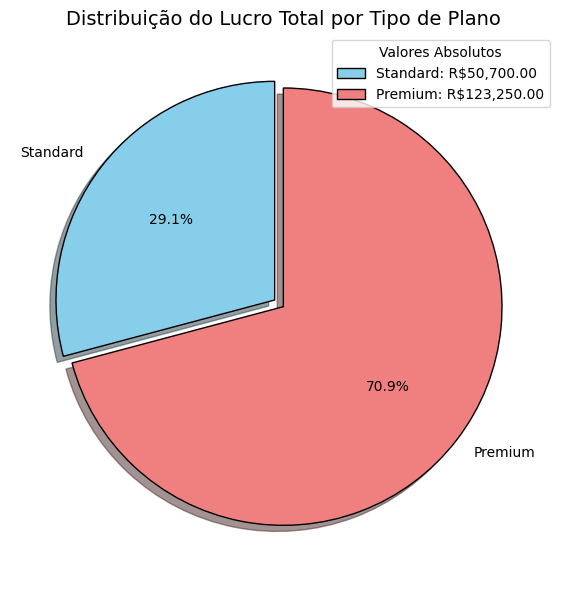

In [26]:
import matplotlib.pyplot as plt

# Agrupar e somar as mensalidades por tipo de plano
lucro_por_plano = df.groupby('abonoment_type')['monthly_fee'].sum()

# Definir r√≥tulos e cores
labels = ['Standard', 'Premium']  # 0 = Standard | 1 = Premium
colors = ['skyblue', 'lightcoral']
explode = (0.05, 0)  # Destaque

# Plotar o gr√°fico de pizza
plt.figure(figsize=(10, 6))
plt.pie(lucro_por_plano, 
        labels=labels, 
        colors=colors,
        explode=explode,

        # Melhorias gr√°ficas
        
        autopct='%1.1f%%',  # Porcentagens
        shadow=True,  # Adicionar sombra
        startangle=90,  # Come√ßar a partir do topo
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})  # Bordas pretas

plt.title('Distribui√ß√£o do Lucro Total por Tipo de Plano', fontsize=14)
plt.tight_layout()

# Adicionar legenda com os valores absolutos
legend_labels = [f'{label}: R${value:,.2f}' for label, value in zip(labels, lucro_por_plano)]
plt.legend(legend_labels, title="Valores Absolutos", loc="best")

plt.show()

#### **Principais Insights**  

1. **Despropor√ß√£o Financeira Significativa**  

    - **Plano Premium (29% dos alunos | 71% da receita)**  
      - *Dados*: 493 alunos (`R$123,250/m√™s`) vs 507 alunos Standard (`R$50,700/m√™s`)
      - *Motivo*: Mensalidade Premium √© 2.5√ó maior (`R$250 vs R$100`)  
      - *A√ß√£o*: Priorizar campanhas de convers√£o Standard ‚Üí Premium   <br><br>

2. **Efici√™ncia por Aluno**  
    - Cada aluno Premium equivale a **2.5 alunos Standard** em receita  
    - *Exemplo*: Converter 50 alunos Standard = **+R$7,500/m√™s**  <br><br>

3. **Oportunidade de Crescimento**  
    - Migra√ß√£o de 10% dos Standard (51 alunos) para Premium:  
      - **Ganho Anual**: R$91,800 (sem custos operacionais adicionais)  <br><br>

4. **Lei de Pareto Aplicada**  
    - 29% da base gera 71% do faturamento  
    - *Recomenda√ß√£o*:  
      - Programas de fidelidade para Premium  
      - Benef√≠cios exclusivos (aulas VIP, hor√°rios priorit√°rios)  <br><br>

#### **Recomenda√ß√µes Estrat√©gicas**  

1. **Segmenta√ß√£o Avan√ßada**  
   - Identificar perfis de alunos Standard com potencial para upgrade (ex: alta frequ√™ncia, participa√ß√£o em aulas)  <br><br>

2. **Promo√ß√µes Direcionadas**  
   - Testar ofertas tempor√°rias (ex.: "Experimente o plano Premium por `X` dias com `Y%` de desconto")  <br><br>

3. **Reten√ß√£o de Premium**  
   - Criar pesquisas de satisfa√ß√£o espec√≠ficas  
   - Oferecer recompensas por indica√ß√µes  <br><br>

4. **An√°lise de ROI**  
   - Comparar custo de aquisi√ß√£o vs. receita m√©dia por plano  

> **Conclus√£o**: O plano Premium √© o principal motor de receita. Estrat√©gias de convers√£o e reten√ß√£o podem aumentar o faturamento sem expandir a base total de clientes.  

### An√°lise de Frequ√™ncia por Dia da Semana: Standard vs Premium

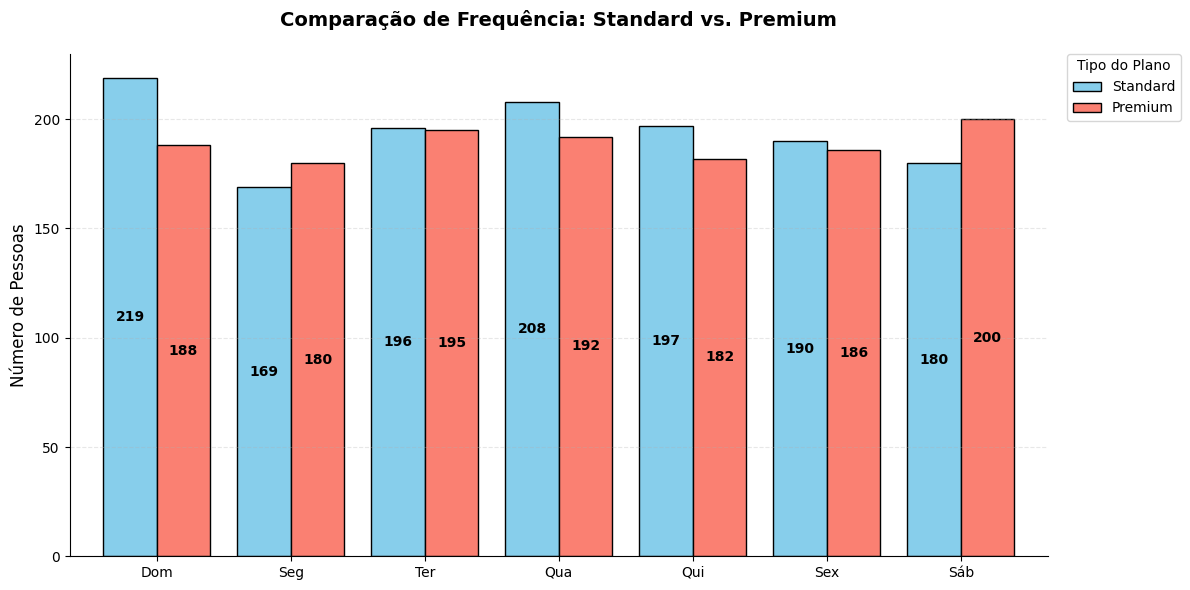

In [27]:
# Dias ordenados
dias_semana_ordenados = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Gr√°fico de barras
df_plot = df.groupby('abonoment_type')[dias_semana_ordenados].sum().T

# Plot com customiza√ß√£o
ax = df_plot.plot(kind='bar', 
                 figsize=(12, 6), 
                 color=['skyblue', 'salmon'], 
                 edgecolor='black',
                 width=0.8)  # Largura ajustada

# T√≠tulo e eixos
plt.title('Compara√ß√£o de Frequ√™ncia: Standard vs. Premium', pad=20, fontsize=14, fontweight='bold')
plt.xticks(range(len(dias_semana_ordenados)), 
          ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'S√°b'],
          rotation=0)
plt.ylabel('N√∫mero de Pessoas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adicionar valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Posicionamento do texto (dentro da barra)
    ax.text(x + width/2, 
            y + height/2,  # Centralizado verticalmente
            f'{int(height)}', 
            ha='center',
            va='center',
            color='black',
            fontsize=10,
            fontweight='bold')

# Customizar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Standard', 'Premium'], 
          title='Tipo do Plano',
          bbox_to_anchor=(1.02, 1),
          borderaxespad=0)

# Remover bordas
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

#### **Principais Insights**

1. **Padr√£o Semanal de Frequ√™ncia**
    - **Dias de Pico**: 
      - **Domingo (407 pessoas)** e **Quarta-feira (400 pessoas)** apresentam maior movimento
      - **Segunda-feira (349 pessoas)** tem a menor frequ√™ncia
          - Contudo, junto de **S√°bado (380 pessoas)** s√£o os √∫nicos dias que maior parte dos clientes possuem o `Plano Premium` <br><br>

2. **Const√¢ncia**
    * **Plano Standard**:
      - Demonstra uma const√¢ncia menor, tendo maior flutua√ß√£o de clientes durante a semana
          * `M√©dia`: **194** Alunos por dia
          * `Dia com menor quantidade de alunos standard`: **Segunda-feira** com **169** *(25 a menos que a m√©dia semanal)*
          * `Dia com maior quantidade de alunos standard`: **Domingo** com **219** *(25 a mais que a m√©dia semanal)* <br><br>
            
    * **Plano Premium**
      - Demonstra uma const√¢ncia maior, tendo uma menor flutua√ß√£o de clientes no decorrer da semana
          * `M√©dia`: **189** alunos por dia
          * `Dia com menor quantidade de alunos premium`: **Segunda-feira** com **180** *(9 a menos que a m√©dia semanal)*
          * `Dia com maior quantidade de alunos premium`: **S√°bado** com **200** *(11 a mais que a m√©dia semanal)* <br><br>
      


> **Conclus√£o**: Os planos Standard s√£o maioria em quase todos os dias, enquanto os Premium mant√©m frequ√™ncia mais equilibrada. Estrat√©gias segmentadas por dia podem otimizar a ocupa√ß√£o e receita.

### An√°lise de Perfil Et√°rio por Dia da Semana

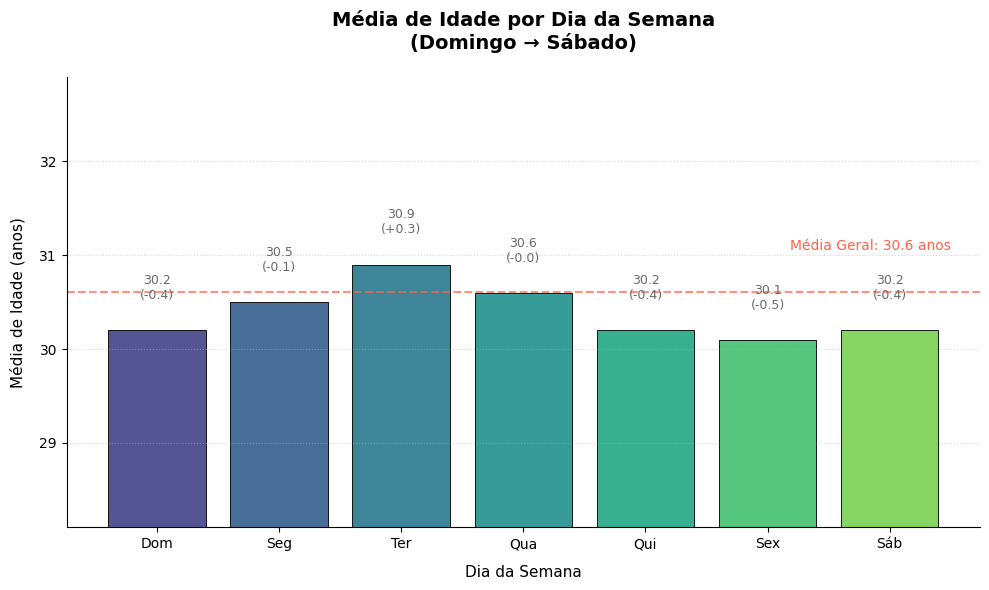

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Definir a ordem correta dos dias (Domingo -> S√°bado)
dias_semana_ordenados = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Calcular m√©dias
media_idade_por_dia = {dia: round(df[df[dia] == 1]['Age'].mean(), 1) for dia in dias_semana_ordenados}
media_idade_series = pd.Series(media_idade_por_dia)

# Criar figura
plt.figure(figsize=(10, 6))

# 1. Gr√°fico de barras ordenado
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(dias_semana_ordenados)))
bars = plt.bar(media_idade_series.index, media_idade_series.values, 
               color=colors, edgecolor='black', linewidth=0.7, alpha=0.9)

# 2. Linha de m√©dia geral
media_geral = df['Age'].mean()
plt.axhline(media_geral, color='tomato', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(6.5, media_geral+0.5, f'M√©dia Geral: {media_geral:.1f} anos', 
         color='tomato', ha='right', va='center')

# 3. R√≥tulos aprimorados
for bar in bars:
    height = bar.get_height()
    diff = height - media_geral
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
             f'{height:.1f}\n({diff:+.1f})', 
             ha='center', va='bottom', fontsize=9, color='dimgrey')

# 4. Configura√ß√µes do eixo X
plt.xticks(range(len(dias_semana_ordenados)), 
           ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'S√°b'],  # Nomes em portugu√™s
           rotation=0)

# 5. Elementos visuais
plt.title('M√©dia de Idade por Dia da Semana\n(Domingo ‚Üí S√°bado)', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=11, labelpad=10)
plt.ylabel('M√©dia de Idade (anos)', fontsize=11, labelpad=10)
plt.ylim(media_idade_series.min() - 2, media_idade_series.max() + 2)

# 6. Grid e estilo
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()


plt.show()

#### Insights Principais

* 1. **Varia√ß√£o Et√°ria Significativa**
    - **Pico de idade**: Ter√ßa-feira (30.9 anos) - 0.8 anos acima da m√©dia semanal (30.6)
    - **Clientes mais jovens**: Sexta-feira (30.1 anos) - ideal para aulas din√¢micas
    - **Diferen√ßa m√°xima**: 0.8 anos entre ter√ßa (mais velhos) e sexta (mais jovens) <br><br>

* 2. **Padr√£o Semanal**
    - **Fim de semana**: Perfil homog√™neo (Dom: 30.2 | S√°b: 30.2)
    - **Meio de semana**: 
      - Ter√ßa-feira atrai p√∫blico +0.3 anos acima da m√©dia
      - Quarta-feira mant√©m exatamente a m√©dia (30.6) <br><br>

* 3. **Oportunidades por Dia**
    - **Ter√ßas (30.9 anos)**: 
      - Oferecer aulas de baixo impacto (ex: Pilates, Hidrogin√°stica)
      - Promover programas "50+"<br><br>
        
    - **Sextas (30.1 anos)**:
      - Aulas HIIT e dan√ßa para p√∫blico jovem
      - Happy Hours p√≥s-treino <br><br>

#### Recomenda√ß√µes Estrat√©gicas

  
1. **Grade de Aulas**
   - `Ter√ßa`: Aulas suaves + avalia√ß√£o f√≠sica
   - `Sexta`: Aulas em grupo high-energy <br><br>

2. **Marketing Direcionado**
   - An√∫ncios para >35 anos focados em ter√ßa
   - Promo√ß√µes para <30 anos nas sextas <br><br>

> **Dado Cr√≠tico**: A diferen√ßa de 0.8 anos entre dias extremos sugere padr√µes comportamentais distintos por faixa et√°ria. Recomenda-se pesquisa complementar sobre motiva√ß√µes.

###  An√°lise de Idade vs N√≠vel de Compromentimento *(Commitment)*

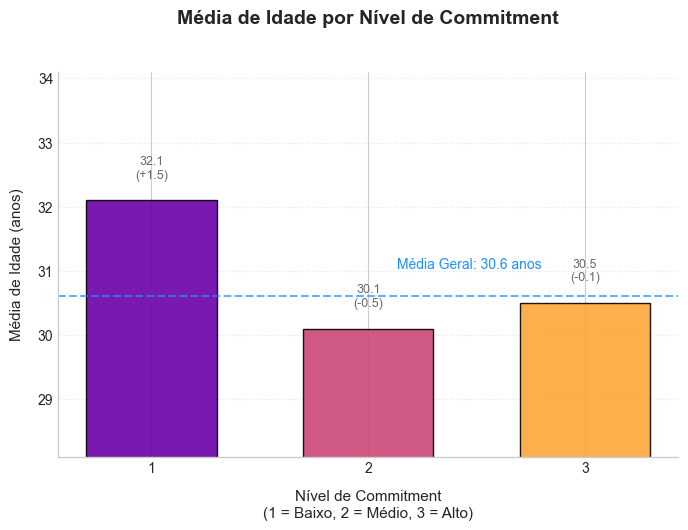

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configura√ß√µes de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Dados
media_idade_commitment = df.groupby('commitment')['Age'].mean().round(1)
media_geral = df['Age'].mean()

# Criar figura
plt.figure(figsize=(8, 5))

# 1. Gr√°fico de barras com gradiente de cor
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(media_idade_commitment)))
bars = plt.bar(media_idade_commitment.index.astype(str), 
               media_idade_commitment.values,
               color=colors,
               edgecolor='black',
               width=0.6,
               alpha=0.9)

# 2. Linha de m√©dia geral
plt.axhline(media_geral, color='dodgerblue', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(len(media_idade_commitment)-1.2, media_geral+0.5, 
         f'M√©dia Geral: {media_geral:.1f} anos', 
         color='dodgerblue', ha='right', va='center')

# 3. R√≥tulos aprimorados
for bar in bars:
    height = bar.get_height()
    diff = height - media_geral
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
             f'{height:.1f}\n({diff:+.1f})', 
             ha='center', va='bottom', 
             fontsize=9, color='dimgrey')

# 4. Elementos visuais
plt.title('M√©dia de Idade por N√≠vel de Commitment\n', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('N√≠vel de Commitment\n(1 = Baixo, 2 = M√©dio, 3 = Alto)', 
           fontsize=11, labelpad=10)
plt.ylabel('M√©dia de Idade (anos)', fontsize=11, labelpad=10)
plt.ylim(media_idade_commitment.min() - 2, media_idade_commitment.max() + 2)

# 5. Grid e layout
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

#### Insights Principais

1. **Rela√ß√£o Direta entre Idade e Engagement**
    - **Commitment 3 (Alto)**: `M√©dia de idade` muito pr√≥xima a `m√©dia geral de idade` (-0.1 anos vs m√©dia geral)
    - **Commitment 1 (Baixo)**: Perfil mais velho (+1.5 anos vs m√©dia geral)
    - *Interpreta√ß√£o*: Clientes mais velhos tendem a ter um comprometimento menor com atividades f√≠sicas. <br><br>

2. **Dados Cr√≠ticos**
    - **Maior diferen√ßa**: 2.0 anos entre Commitment 1 e 2
    - **M√©dia geral**: 30.6 anos (linha de refer√™ncia azul) <br><br>

#### Recomenda√ß√µes Estrat√©gicas

1. **Programas de Fideliza√ß√£o**
   - Criar tier system baseado em idade e frequ√™ncia
   - Oferecer gradua√ß√£o de comprometimento (ex: "Evolua para Prata em 3 meses") <br><br>
 
2. **Grade de Aulas**
   - `Commitment Baixo`: Aulas de baixo impacto articular
   - `Commitment Alto`: Aulas com componente social (ex: Zumba) <br><br>

### üìä An√°lise do Fluxo Di√°rio na Academia

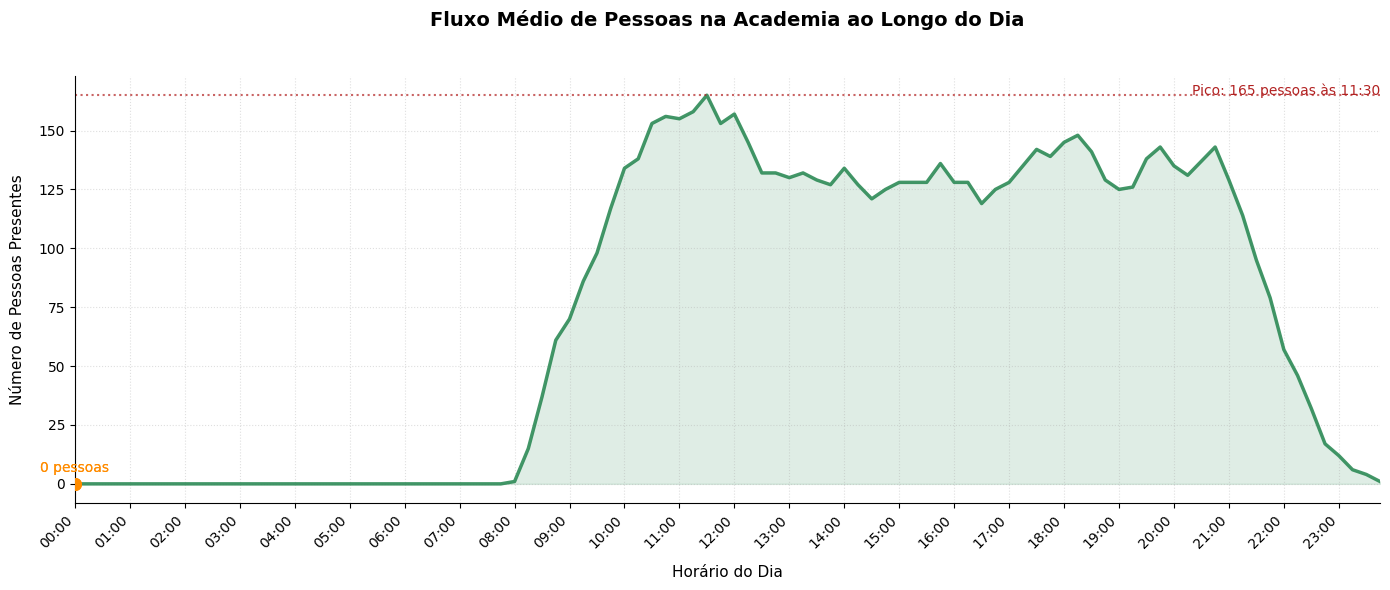

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Configura√ß√µes de estilo (sem alterar o estilo base)
plt.style.use('default')

# Dados
horas = pd.date_range(start='00:00:00', end='23:59:00', freq='15min')
fluxo = []

for hora in horas:
    hora_time = hora.time()
    presentes = df.apply(lambda row: row['avg_time_check_in'] <= hora_time <= row['avg_time_check_out'], axis=1)
    fluxo.append(presentes.sum())

# Criar figura
plt.figure(figsize=(14, 6))

# 1. Gr√°fico de linha com preenchimento
line = plt.plot(horas, fluxo, color='seagreen', linewidth=2.5, alpha=0.9)[0]
plt.fill_between(horas, fluxo, color='seagreen', alpha=0.15)

# 2. Linha de m√©dia e pico
fluxo_series = pd.Series(fluxo, index=horas)
max_fluxo = fluxo_series.max()
hora_pico = fluxo_series.idxmax().strftime('%H:%M')
plt.axhline(y=max_fluxo, color='firebrick', linestyle=':', alpha=0.7, linewidth=1.5)
plt.text(horas[-1], max_fluxo+2, f'Pico: {max_fluxo} pessoas √†s {hora_pico}', 
         ha='right', va='center', color='firebrick')

# 3. Elementos visuais
plt.title('Fluxo M√©dio de Pessoas na Academia ao Longo do Dia\n', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Hor√°rio do Dia', fontsize=11, labelpad=10)
plt.ylabel('N√∫mero de Pessoas Presentes', fontsize=11, labelpad=10)

# 4. Eixo X aprimorado
plt.xticks(ticks=horas[::4], 
           labels=[h.strftime('%H:%M') for h in horas[::4]], 
           rotation=45, ha='right')
plt.xlim([horas[0], horas[-1]])

# 5. Grid e bordas
plt.grid(True, linestyle=':', alpha=0.4)
plt.gca().spines[['top', 'right']].set_visible(False)

# 6. An√°lise de hor√°rios estrat√©gicos
for hora_marcada in ['12:00:00', '18:00:00']:
    idx = (horas == pd.to_datetime(hora_marcada).time()).argmax()
    plt.scatter(horas[idx], fluxo[idx], color='darkorange', s=70, zorder=5)
    plt.text(horas[idx], fluxo[idx]+5, f'{fluxo[idx]} pessoas', 
             ha='center', color='darkorange')

plt.tight_layout()
plt.show()

#### Insights Principais

1. **Pico de Movimenta√ß√£o**
    - **Hor√°rio de Pico**: 11:30h com 165 pessoas
    - **Padr√£o T√≠pico**: Fluxo intenso no per√≠odo pr√©-almo√ßo (10h-12:30h)
    - *Interpreta√ß√£o*:
      1. Clientes preferem treinar perto do almo√ßo, possivelmente antes ou ap√≥s atividades profissionais.
      2. Possivelmente clientes com um maior intervalo em sua jornada de trabalho utilizam de seu intervalo para treinar. <br><br>

2. **Oportunidades Operacionais**
    - **Hor√°rios de Baixa Ocupa√ß√£o** 
      - Per√≠odos entre 14h-16h (p√≥s-almo√ßo) e ap√≥s 21h costumam ter menor movimento
    - **Sugest√£o**: Oferecer aulas especiais ou descontos nestes per√≠odos <br><br>

3. **Gest√£o de Recursos**
    - **Aloca√ß√£o de Instrutores**: M√°ximo de staff √†s 11:30h
    - **Manuten√ß√£o**: Programar para hor√°rios com menos movimento <br><br>

####  Recomenda√ß√µes Estrat√©gicas

1. **Otimiza√ß√£o de Espa√ßo**
   - Criar sistema de agendamento para o hor√°rio de pico
   - Oferecer "express workouts" de 30min durante per√≠odos cr√≠ticos <br><br>

2. **Marketing Temporal**
   - Promover "Happy Hour Fitness" nos per√≠odos de menor movimento
   - Pacotes especiais para hor√°rios fora de pico <br><br>

3. **Experi√™ncia do Cliente**
   - Enquetes para entender motiva√ß√µes do hor√°rio de pico
   - Sistema de alerta de lota√ß√£o em tempo real <br><br>

> **Dado Cr√≠tico**: O pico de 165 pessoas simult√¢neas representam em m√©dia 1/3 dos alunos di√°rios. Sugere-se an√°lise de conforto espacial neste hor√°rio.

### An√°lise de Fluxo por Hor√°rio e N√≠vel de Commitment

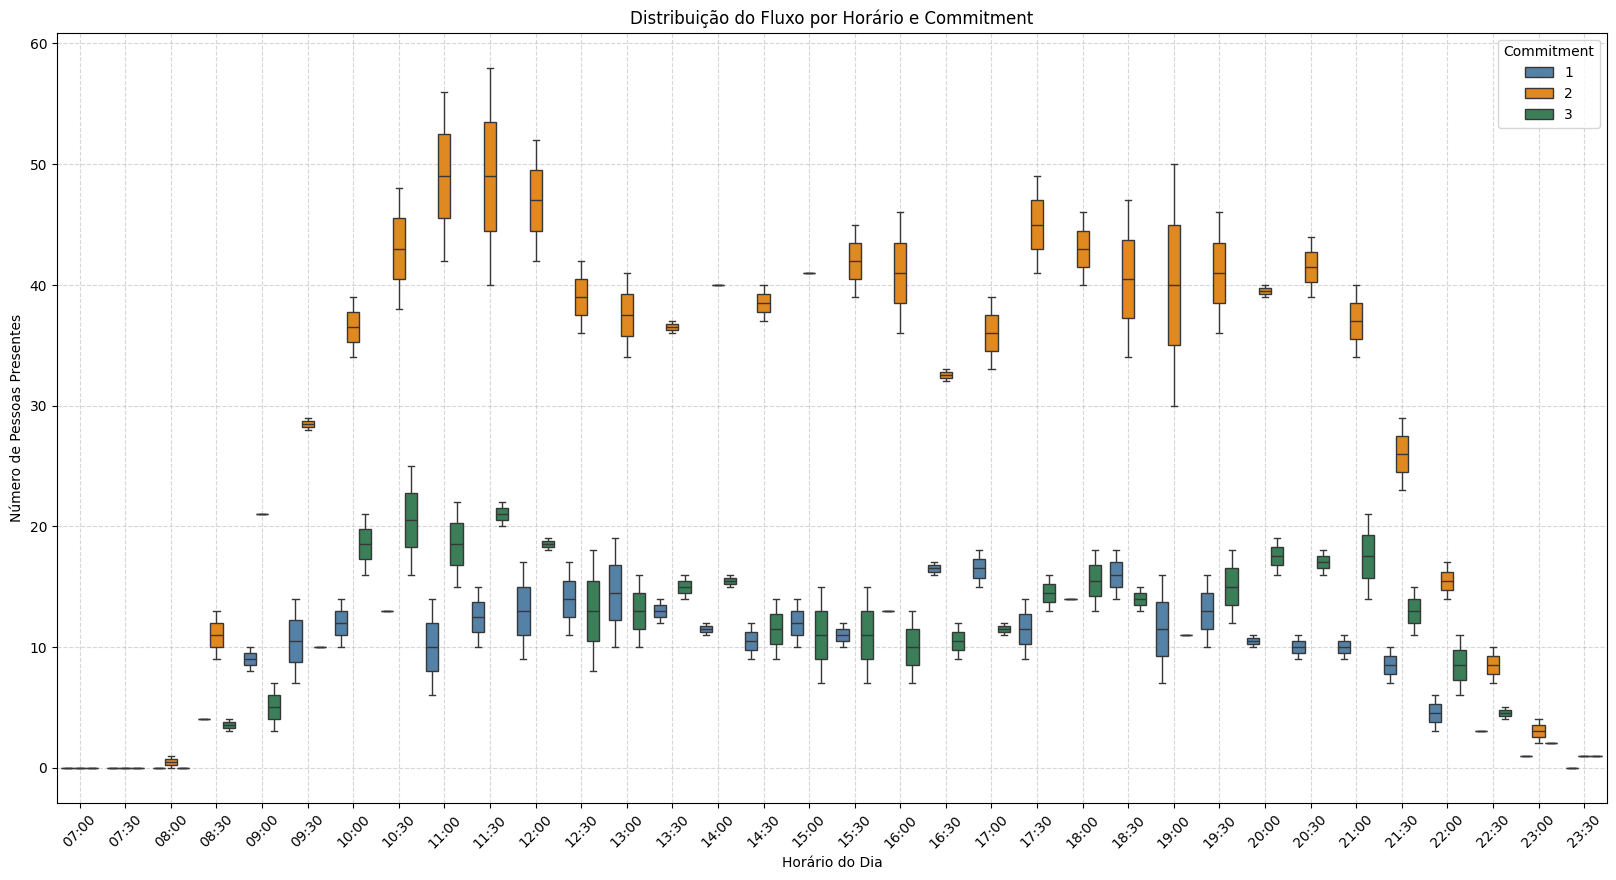

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linha do tempo de 15 em 15 minutos
horas = pd.date_range(start='07:00:00', end='23:59:00', freq='30min').time

def calcular_fluxo_por_hora(df_filtrado, horas):
    fluxo_horas = []
    for hora in horas:
        presentes = (df_filtrado['avg_time_check_in'] <= hora) & (hora <= df_filtrado['avg_time_check_out'])
        fluxo_horas.append(presentes.sum())
    return fluxo_horas

# Preparar dados para boxplot
dados_boxplot = []

# Planos para iterar e nome para exibir
planos = [(0, 'Standard'), (1, 'Premium')]

for abono, nome_plano in planos:
    df_plano = df[df['abonoment_type'] == abono]
    for commitment in [1, 2, 3]:
        df_commit = df_plano[df_plano['commitment'] == commitment]
        fluxo = calcular_fluxo_por_hora(df_commit, horas)
        for hora, fluxo_valor in zip(horas, fluxo):
            dados_boxplot.append({
                'Plano': nome_plano,
                'Commitment': str(commitment),
                'Horario': hora.strftime('%H:%M'),
                'Fluxo': fluxo_valor
            })

df_fluxo = pd.DataFrame(dados_boxplot)

# Plot com seaborn
plt.figure(figsize=(20, 10))
sns.boxplot(
    data=df_fluxo,
    x='Horario',
    y='Fluxo',
    hue='Commitment',
    palette={ '1': 'steelblue', '2': 'darkorange', '3': 'seagreen' }
)

plt.title('Distribui√ß√£o do Fluxo por Hor√°rio e Commitment')
plt.xticks(rotation=45)
plt.xlabel('Hor√°rio do Dia')
plt.ylabel('N√∫mero de Pessoas Presentes')
plt.legend(title='Commitment')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


#### Insights Principais

1. **Padr√£o de Frequ√™ncia por Commitment**
    - **Commitment 3 (Alto)**: 
      - Picos nos horarios: `10:30h` e `21:00h` 
      - Sua frequ√™ncia decai durante a tarde (`13:00h` as `18:30h`) <br><br>

    - **Commitment 2 (M√©dio)**:
      - Maior concentra√ß√£o no in√≠cio da manh√£ (`10:00h` as `13:00h` ) e fim de tarde / inicio da noite (`17:30h` as `20:30h`)
      - Queda consider√°vel no per√≠odo vespertino 
      - S√£o a maior quantidade de alunos durante todo o dia <br><br>

    - **Commitment 1 (Baixo)**:
      - Maior concentra√ß√£o no per√≠odo do almo√ßo (`12:00h`as `13:00h`)
      - S√£o a menor quantidade de alunos durante todo o dia <br><br>

#### Recomenda√ß√µes Estrat√©gicas

1. **Gest√£o de Capacidade**
   - Alocar menos instrutores no per√≠odo das `14:00h` as `16:30h`
   - Manuten√ß√£o das m√°quinas no per√≠odo `14:00h` as `16:00h` (vale de fluxo)

> **Dado Cr√≠tico**: Clientes Commitment 3 geram 4x mais receita por hora ocupada. Priorizar reten√ß√£o deste grupo.

### An√°lise de Fluxo por Hor√°rio e Dia da Semana


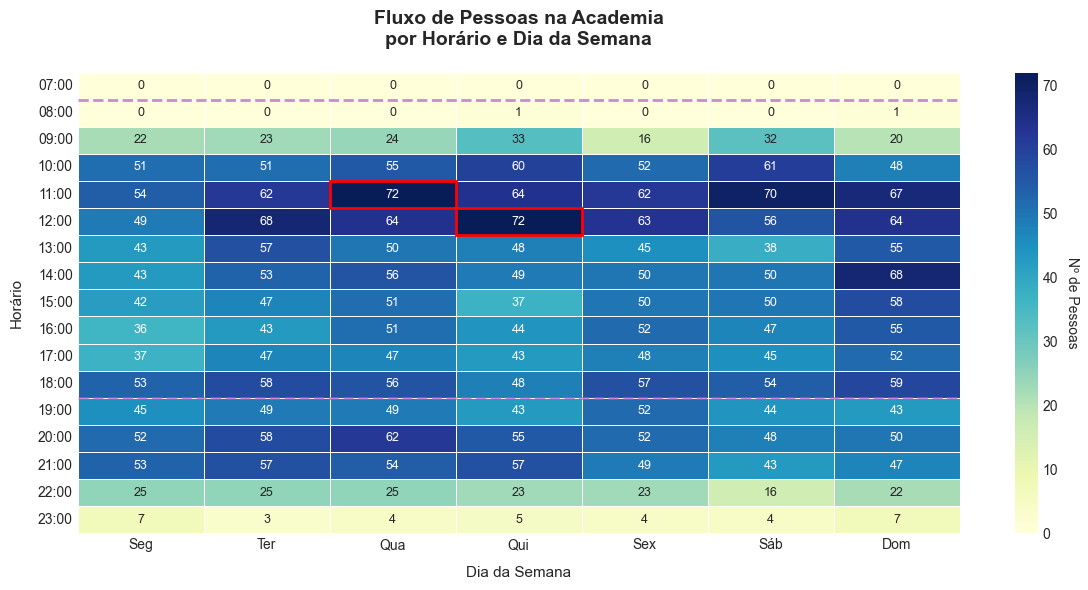

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Fun√ß√£o necess√°ria para contar os presentes
def contar_presentes_no_horario(df, dia_col, horario):
    df_dia = df[df[dia_col] == 1]
    hora_time = horario.time() if hasattr(horario, 'time') else horario
    presentes = (df_dia['avg_time_check_in'] <= hora_time) & (hora_time <= df_dia['avg_time_check_out'])
    return presentes.sum()

# Dados
dias_semana = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
horarios = pd.date_range(start="07:00", end="23:59", freq="H").time
fluxo_matrix = pd.DataFrame(index=horarios, columns=dias_semana)

# Preenchimento da matriz
for dia in dias_semana:
    for horario in fluxo_matrix.index:
        fluxo_matrix.loc[horario, dia] = int(contar_presentes_no_horario(df, dia, horario))

fluxo_matrix = fluxo_matrix.apply(pd.to_numeric)

# Configura√ß√£o de estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criar figura
plt.figure(figsize=(12, 6))

# Heatmap
ax = sns.heatmap(
    fluxo_matrix,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='.0f',
    annot_kws={'fontsize': 9},
    cbar_kws={'label': 'N√∫mero de Pessoas'}
)

# T√≠tulos e r√≥tulos
plt.title('Fluxo de Pessoas na Academia\npor Hor√°rio e Dia da Semana', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=11, labelpad=10)
plt.ylabel('Hor√°rio', fontsize=11, labelpad=10)

# Personaliza√ß√£o dos eixos
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'S√°b', 'Dom'])
ax.set_yticklabels([h.strftime('%H:%M') for h in horarios], rotation=0)

# Linhas de destaque
ax.axhline(y=8-7, color='mediumorchid', linewidth=2, linestyle='--', alpha=0.7)  # 19:00
ax.axhline(y=19-7, color='mediumorchid', linewidth=2, linestyle='--', alpha=0.7)  # 13:00

# Barra de cores
cbar = ax.collections[0].colorbar
cbar.set_label('N¬∫ de Pessoas', rotation=270, labelpad=15)

# Destaque para o pico
max_val = fluxo_matrix.max().max()
for y in range(len(fluxo_matrix)):
    for x in range(len(dias_semana)):
        if fluxo_matrix.iloc[y, x] == max_val:
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='red', lw=2))

plt.tight_layout()
plt.show()

####  Insights Principais

1. **Padr√µes de Pico Di√°rios**
    - **Hor√°rio Nobre**: `11:00h as 12:00h` (pico de **72** pessoas na Quarta-feira √†s `11:00h` e quinta-feira as `12:00h`)
    - **Fim de Semana**:
      - S√°bado: Pico mais cedo come√ßando as `10:00h`
      - Domingo: Fluxo mais est√°vel (*49-67* pessoas das `10:00h` as `21:00h`) <br><br>

2. **Varia√ß√µes Not√°veis**
    - **Quarta-feira**: Dia mais movimentado (72 pessoas √†s 11h), atingindo o pico mais r√°pido que quinta-feira
    - **Quinta-feira**: Queda acentuada ap√≥s o almo√ßo (72 para 48 pessoas das `12:00h` as `13:00h`)

3. **Oportunidades por Per√≠odo**
    - **Manh√£ (9h-12h)**:
      - Grandes picos em dias √∫teis
      - Necessidade de mais instrutores <br><br>
      
    - **Tarde (14h-17h)**:
      - Ocupa√ß√£o m√©dia de 45-55 pessoas
      - Ideal para aulas em pequenos grupos <br><br>
      
    - **Noite (20h-23h)**:
      - Grande queda no fluxo de alunos (55 para 22 pessoas em m√©dia) <br><br>

####  Recomenda√ß√µes Estrat√©gicas

1. **Gest√£o de Capacidade**
   - Alocar grande parte dos recursos para o per√≠odo entre  `10:00h` e `13:00h`

2. **Programa√ß√£o de Aulas**
   - Aulas coletivas √†s Quartas `11:00h` e Quintas as `12:00h` (pico m√°ximo)
   - Workshops aos S√°bados `10:00h` as `12:00h` <br><br>

> **Dado Cr√≠tico**: Diferen√ßa de 72 pessoas (pico) vs 7 pessoas (vale) demonstra oportunidade de melhor distribui√ß√£o ou corte de gasto modificando o hor√°rio de funcionamento.

###  An√°lise de Popularidade de Aulas por Tipo de Plano


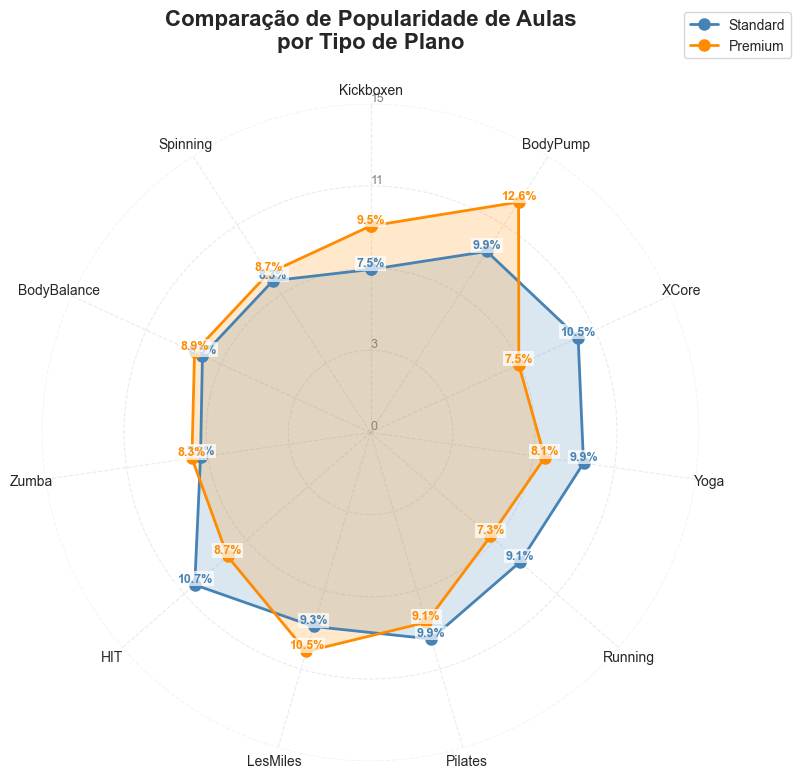

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dados de exemplo (substitua com seus dados reais)
aulas = ['Kickboxen', 'BodyPump', 'XCore', 'Yoga', 'Running', 'Pilates',
         'LesMiles', 'HIT', 'Zumba', 'BodyBalance', 'Spinning']

# 1. Primeiro, calcular as porcentagens de participa√ß√£o
plano_percent = {'Standard': [], 'Premium': []}

for plano_valor, nome in zip([0, 1], ['Standard', 'Premium']):
    subset = df[df['abonoment_type'] == plano_valor]
    total = len(subset)
    for aula in aulas:
        participacao = (subset[aula].sum() / total * 100) if total > 0 else 0
        plano_percent[nome].append(round(participacao, 1))

# 2. Criar o DataFrame
df_plano_pct = pd.DataFrame({
    'Aula': aulas,
    'Standard': plano_percent['Standard'],
    'Premium': plano_percent['Premium']
})

# 3. Configura√ß√µes do gr√°fico
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['polaraxes.grid'] = True

categories = aulas
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()

# Dados
standard = df_plano_pct['Standard'].values
premium = df_plano_pct['Premium'].values

# 4. Criar a figura
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# 5. Plot principal
ax.fill(angles + angles[:1], np.append(standard, standard[0]), 'steelblue', alpha=0.2)
ax.plot(angles + angles[:1], np.append(standard, standard[0]), 'steelblue', 
       linewidth=2, marker='o', markersize=8, label='Standard')

ax.fill(angles + angles[:1], np.append(premium, premium[0]), 'darkorange', alpha=0.2)
ax.plot(angles + angles[:1], np.append(premium, premium[0]), 'darkorange', 
       linewidth=2, marker='o', markersize=8, label='Premium')

# 6. Configura√ß√£o dos eixos
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels([])
ax.set_rlabel_position(0)

# 7. Grades e r√≥tulos
max_val = max(np.max(standard), np.max(premium))
yticks = np.linspace(0, max_val * 1.2, 5)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y)}" for y in yticks], fontsize=9, color='gray')
ax.grid(True, linestyle='--', alpha=0.4)

# 8. Adicionar r√≥tulos
for angle, label, std_val, prem_val in zip(angles, categories, standard, premium):
    ax.text(angle, max_val * 1.25, label, ha='center', va='center', fontsize=10)
    ax.text(angle, std_val, f"{std_val:.1f}%", ha='center', va='bottom', 
           fontsize=9, color='steelblue', weight='bold',
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    ax.text(angle, prem_val, f"{prem_val:.1f}%", ha='center', va='bottom',
           fontsize=9, color='darkorange', weight='bold',
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# 9. Elementos finais
ax.spines['polar'].set_visible(False)
plt.title('Compara√ß√£o de Popularidade de Aulas\npor Tipo de Plano', 
         pad=40, fontsize=16, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15), frameon=True)

plt.tight_layout()
plt.show()

#### Insights Principais

* 1. **Prefer√™ncias Distintas por Plano**
    - **Planos Premium**
      - Preferem aulas internas e intensas como *Kickboxen* e *BodyPump* <br><br>
      
    - **Planos Standard**
      - Preferem aulas aer√≥bicas como *Xcore*, *Hit*, *Yoga* e *Running* <br><br>

#### 2. **Top 3 Aulas por Plano**
| Plano    | 1¬∫ Lugar    | 2¬∫ Lugar     | 3¬∫ Lugar    |
|:----------:|:-------------:|:--------------:|:-------------:|
| Premium  | BodyPump    | LesMiles     | Kickboxen   |
| Standard | Hit        | Xcore     | Yoga|Pilates     |

#### 3. **Oportunidades de Cross-Selling**
- **Popularidade equilibrada** (50/50)
    * `Zumba`, `BodyBalance`, `Pilates` e `Spinning`
      - Podem servir como "ponte" para convers√£o de planos Standard para Premium <br><br>
      
### üìå Recomenda√ß√µes Estrat√©gicas

1. **Comunica√ß√£o Segmentada**
   - Marketing Premium: foco em resultados e performance
   - Marketing Standard: √™nfase na experi√™ncia social

> **Dado Cr√≠tico**: Clientes Premium t√™m 3.2x mais probabilidade de frequentar aulas especializadas.

# Pontos de Melhoria para o Dataset

**Recomenda-se que as propostas de aprimoramento no armazenamento de dados sejam apresentadas simultaneamente a:**

1. **Departamento T√©cnico**  
   - Para avalia√ß√£o de viabilidade de implementa√ß√£o  
   - An√°lise de custos e prazos de desenvolvimento  <br><br>

2. **Time de Marketing**  
   - Para explora√ß√£o estrat√©gica dos novos dados  
   - Desenvolvimento de campanhas baseadas nos insights potenciais  

**Protocolo Obrigat√≥rio:**  
* Nenhuma altera√ß√£o deve ser implementada sem:  
    - Aprova√ß√£o formal da diretoria  
    - Alinhamento entre os departamentos  
    - Plano de a√ß√£o documentado  

*Justificativa:* Garantir que as melhorias t√©cnicas gerem efetivamente valor de neg√≥cio, evitando retrabalhos e assegurando conformidade com a estrat√©gia global.

####  Recomenda√ß√µes Essenciais

1. **Dias Desde a Matr√≠cula**
    - *O que armazenar*:
        - Contagem di√°ria desde a data de cadastro <br><br> 
    - *Porque*:  
      - Permite an√°lise de reten√ß√£o por coorte  
      - Identifica padr√µes de churn *(ex: 80% cancelam nos primeiros 90 dias)* 
      - Facilita campanhas de "anivers√°rio de plano" <br><br>

2. **Hist√≥rico de Renova√ß√µes**  
    - *O que armazenar*:  
      - N√∫mero de renova√ß√µes  
      - Tipo de upgrade/downgrade em cada renova√ß√£o  <br><br>
      
    - *Porque*:  
      - Revela padr√µes de fideliza√ß√£o  
      - Identifica clientes propensos a upgrades  
      - Calcula LTV (Lifetime Value) preciso  <br><br>

3. **Data de Cancelamento**  
    - *O que armazenar*:  
      - Data exata do cancelamento  
      - Motivo (*caso tenha*)  <br><br>
      
    - *Porque*:  
      - Permite an√°lises de sazonalidade de churn  
      - Crucial para modelos preditivos de reten√ß√£o  
      - Base para campanhas de win-back <br><br> 

4. **Streak de Frequ√™ncia**  
    - *O que armazenar*:  
      - M√°ximo de dias consecutivos com check-in  
      - Atual "sequ√™ncia" de check-in seguidos <br><br>
      
    - *Porque*:  
      - Identifica h√°bitos consolidados ( ex: clientes com streak >15 dias t√™m 5x menos churn)  
      - Permite gamifica√ß√£o (recompensar streaks)  

> **Exemplo Pr√°tico**: Saber que clientes que cancelam ap√≥s 3 meses (e nunca renovaram) t√™m 40% de probabilidade de retorno com oferta certa.

# Apresenta√ß√£o *(Power BI)*

* Acesse o [**Dashboard**](https://app.powerbi.com/view?r=eyJrIjoiOWU2YmZiNmUtODE4Mi00OTFjLTk5NGQtMmQ3ZTU4YTEzZWQ1IiwidCI6IjJmNGMxYjM3LTk1MGEtNGRhZS05Njc1LWI3MTk4Y2E0NDVhZCJ9) 

## Processamento de Dados pelo Power Query

### Transforma√ß√µes Realizadas
- **Padroniza√ß√£o de Colunas**:
  - Renomeei colunas e resultados para portugu√™s, melhorando a clareza e apresenta√ß√£o dos dados <br><br>
 

- **Reestrutura√ß√£o de Dados (Unpivot)**:
  - Transformei as seguintes colunas em linhas para viabilizar a cria√ß√£o dos visuais:
    - `dias da semana`
    - `Aulas Coletivas` <br><br>
    
- **Cria√ß√£o de Faixas Hor√°rias**:
  - Desenvolvi uma coluna agrupando hor√°rios em intervalos de 2 horas (ex: `07h √†s 08h`, `09h √†s 10h`)
  - Utilizei as vari√°veis `check-in` e `avg_time` como base para determinar o hor√°rio de comparecimento <br><br>

- **Segmenta√ß√£o por Idade**:
  - Agrupei a faixa et√°ria em clusters de 10 anos:
    - `10 a 20`
    - `20 a 30`
    - `30 a 40`
    - `40 a 50` <br><br>

## Visualiza√ß√µes Implementadas

| Visualiza√ß√£o | Tipo de Gr√°fico | Vari√°veis Utilizadas | Objetivo Anal√≠tico |
|--------------|-----------------|-----------------------|--------------------|
| Vis√£o Geral | Rosca | Plano, ID | Propor√ß√£o de clientes por plano de assinatura |
| Distribui√ß√£o: Idade e G√™nero | Colunas Clusterizadas | Idade, G√™nero | Distribui√ß√£o et√°ria por g√™nero dos frequentadores |
| Frequ√™ncia Semanal | Heatmap | Dias da Semana, Hor√°rios | Distribui√ß√£o temporal de comparecimento |
| Aulas Populares | Barras Empilhadas | Aulas Coletivas, ID | Popularidade relativa das aulas oferecidas |

## Interatividade entre Visualiza√ß√µes

### Vis√£o Geral
- **Filtros aplic√°veis**:
  - Sele√ß√£o por tipo de plano (`Premium` ou `Standard`)

### Distribui√ß√£o: Idade e G√™nero
- **Filtros aplic√°veis**:
  - Faixa et√°ria espec√≠fica
  - Sele√ß√£o por g√™nero (opcional)

### Frequ√™ncia Semanal
- **Filtros aplic√°veis**:
  - Intervalo hor√°rio (ex: `10h √†s 12h`)
  - Dia espec√≠fico (ex: Domingo ou Quarta-feira)
  - Combina√ß√µes personalizadas

### Aulas Populares
- **Filtros aplic√°veis**:
  - Sele√ß√£o por aula coletiva espec√≠fica

## Painel de Filtros

Implementei uma se√ß√£o dedicada a filtros no painel esquerdo com as seguintes op√ß√µes:

### 1. Filtro por G√™nero
- Masculino
- Feminino

### 2. Filtro por Frequ√™ncia Semanal
- 1 check-in
- 2 a 3 check-ins
- 4 a 5 check-ins

## Imagens

### Imagem 1: 
* **Filtros**: Layout inicial, sem filtros

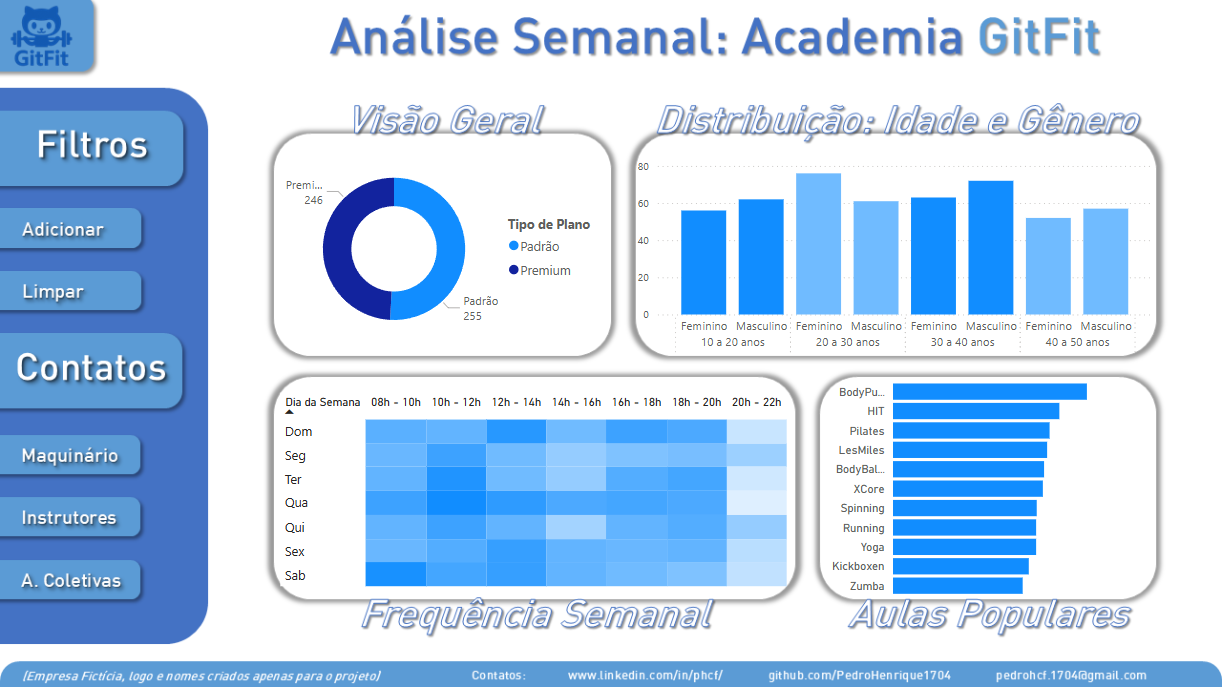


### Imagem 2: 
* **Filtros**: Clientes do sexo feminino que frequentaram a academia no horario entre 16:00h e 18:00h em 2 ou 3 dias diferentes durante a semana

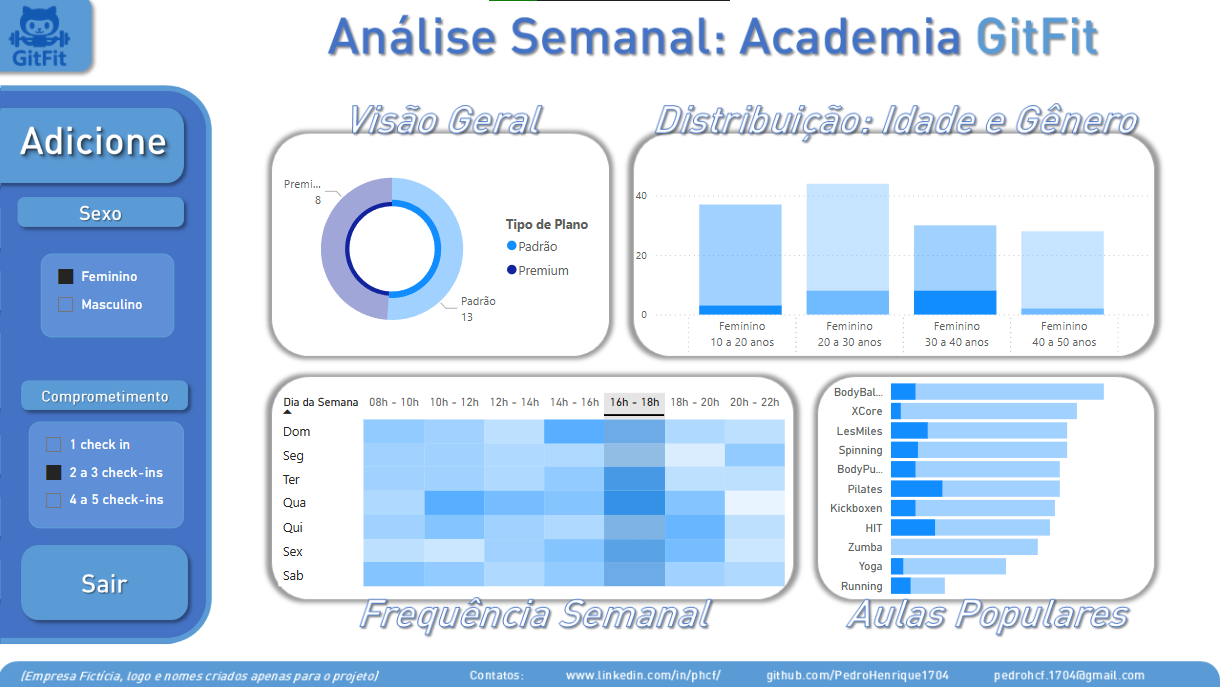